<a href="https://colab.research.google.com/github/Fuenfgeld/DMA2022DataProjectB/blob/main/check_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Überprüfung der Brustkrebsdaten

In [1]:
#Laden Libraries
import sqlite3
import pandas as pd



In [2]:
# Laden GitHub repo
%cd /content/
%rm -r ./DMA2022DataProjectB
!git clone https://github.com/Fuenfgeld/DMA2022DataProjectB.git
    
%cd ./DMA2022DataProjectB/

/content
rm: cannot remove './DMA2022DataProjectB': No such file or directory
Cloning into 'DMA2022DataProjectB'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 145 (delta 40), reused 49 (delta 17), pack-reused 55
Receiving objects: 100% (145/145), 3.10 MiB | 17.36 MiB/s, done.
Resolving deltas: 100% (62/62), done.
/content/DMA2022DataProjectB


In [3]:
# Laden Daten
patient = pd.read_csv('BreastCancerData/patients.csv', sep=",")
condition = pd.read_csv('BreastCancerData/conditions.csv', sep=",")
medication = pd.read_csv('BreastCancerData/medications.csv', sep=",")
observation = pd.read_csv('BreastCancerData/observations.csv', sep=",")
procedure = pd.read_csv('BreastCancerData/procedures.csv', sep=",")

# Tabellen Information

In [4]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1019 non-null   object 
 1   BIRTHDATE            1019 non-null   object 
 2   DEATHDATE            19 non-null     object 
 3   SSN                  1019 non-null   object 
 4   DRIVERS              854 non-null    object 
 5   PASSPORT             803 non-null    object 
 6   PREFIX               831 non-null    object 
 7   FIRST                1019 non-null   object 
 8   LAST                 1019 non-null   object 
 9   SUFFIX               15 non-null     object 
 10  MAIDEN               280 non-null    object 
 11  MARITAL              689 non-null    object 
 12  RACE                 1019 non-null   object 
 13  ETHNICITY            1019 non-null   object 
 14  GENDER               1019 non-null   object 
 15  BIRTHPLACE           1019 non-null   o

In [5]:
patient.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,1956-06-22,NaN,999-51-6528,S99944910,X29408602X,Mr.,Lucio648,Simonis280,NaN,...,Worcester Massachusetts US,636 Wiegand Loaf,Cambridge,Massachusetts,Middlesex County,2140.0,42.359926,-71.113260,1475230.00,4244.64
1,073d8e80-ff90-1c8d-57e4-29bfca52c87f,1964-08-28,NaN,999-90-4728,S99976204,X17497441X,Mrs.,Buffy238,Wolf938,NaN,...,Somerville Massachusetts US,972 Satterfield Trafficway Apt 71,North Brookfield,Massachusetts,Worcester County,1535.0,42.257845,-72.026317,1489125.00,4016.36
2,e1ff7e68-4097-9faf-514d-e4cfcfdf252e,1998-08-28,NaN,999-82-3645,S99973929,X88553898X,Ms.,Debora709,Klocko335,NaN,...,Williamstown Massachusetts US,589 Koss Station,Worcester,Massachusetts,Worcester County,1545.0,42.204290,-71.818449,57142.44,2103.20
3,a0f679cc-875f-dd72-ed13-9ca863ec6cf3,2004-01-20,NaN,999-93-6431,S99923001,NaN,NaN,Walton167,Kessler503,NaN,...,New Braintree Massachusetts US,777 Gusikowski Drive,Weymouth,Massachusetts,Norfolk County,NaN,42.150270,-70.904084,408520.00,2709.00
4,e4166a9c-f7c5-bef7-ea43-b96281a2d586,2006-03-23,NaN,999-11-8697,NaN,NaN,NaN,Mariano761,Wiegand701,NaN,...,Canton Massachusetts US,156 Herman Knoll,Worcester,Massachusetts,Worcester County,1609.0,42.292082,-71.784873,320400.00,2970.68


In [6]:
condition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START        222 non-null    object 
 1   STOP         0 non-null      float64
 2   PATIENT      222 non-null    object 
 3   ENCOUNTER    222 non-null    object 
 4   CODE         222 non-null    int64  
 5   DESCRIPTION  222 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ KB


In [7]:
condition.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2018-08-31,NaN,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,5075ad6e-11d5-017d-f011-253c838a1d86,53741008,Coronary Heart Disease
1,1984-11-07,NaN,b4001499-a15a-980e-e3bb-e73b63045411,c59520e4-f152-0952-8445-3b62ac99b1f3,49436004,Atrial Fibrillation
2,1987-01-07,NaN,6c7c535b-322d-362f-2767-f80b0a03b7f8,da76aa6d-f677-da4b-dfc7-15adf22d4ffd,410429000,Cardiac Arrest
3,1987-01-07,NaN,6c7c535b-322d-362f-2767-f80b0a03b7f8,da76aa6d-f677-da4b-dfc7-15adf22d4ffd,429007001,History of cardiac arrest (situation)
4,2014-08-06,NaN,f5a6e3b3-781d-d800-d4c3-1782e39258e8,d6a78205-ee1f-52a9-3fa6-b4cdd981f9f3,53741008,Coronary Heart Disease


In [8]:
medication.head()

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2018-08-31T11:47:46Z,NaN,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,5075ad6e-11d5-017d-f011-253c838a1d86,309362,Clopidogrel 75 MG Oral Tablet,54.54,0.0,27,1472.58,NaN,NaN
1,2018-08-31T11:47:46Z,NaN,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,5075ad6e-11d5-017d-f011-253c838a1d86,312961,Simvastatin 20 MG Oral Tablet,25.21,0.0,27,680.67,NaN,NaN
2,2018-08-31T11:47:46Z,NaN,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,5075ad6e-11d5-017d-f011-253c838a1d86,197361,Amlodipine 5 MG Oral Tablet,6.72,0.0,27,181.44,NaN,NaN
3,2018-08-31T11:47:46Z,NaN,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,5075ad6e-11d5-017d-f011-253c838a1d86,705129,Nitroglycerin 0.4 MG/ACTUAT Mucosal Spray,70.26,0.0,27,1897.02,NaN,NaN
4,1984-11-07T16:26:07Z,NaN,b4001499-a15a-980e-e3bb-e73b63045411,4d71f845-a6a9-3c39-b242-14d25ef86a8d,c59520e4-f152-0952-8445-3b62ac99b1f3,855332,Warfarin Sodium 5 MG Oral Tablet,15.53,0.0,439,6817.67,NaN,NaN


In [9]:
observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31555 entries, 0 to 31554
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DATE         31555 non-null  object
 1   PATIENT      31555 non-null  object
 2   ENCOUNTER    103 non-null    object
 3   CODE         31555 non-null  object
 4   DESCRIPTION  31555 non-null  object
 5   VALUE        31555 non-null  object
 6   UNITS        31464 non-null  object
 7   TYPE         31555 non-null  object
dtypes: object(8)
memory usage: 1.9+ MB


In [10]:
observation.head()

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2010-06-22T10:47:46Z,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,NaN,QALY,QALY,53.0,a,numeric
1,2011-06-22T10:47:46Z,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,NaN,QALY,QALY,54.0,a,numeric
2,2012-06-22T10:47:46Z,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,NaN,QALY,QALY,55.0,a,numeric
3,2013-06-22T10:47:46Z,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,NaN,QALY,QALY,56.0,a,numeric
4,2014-06-22T10:47:46Z,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,NaN,QALY,QALY,57.0,a,numeric


In [11]:
procedure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE               746 non-null    object 
 1   PATIENT            746 non-null    object 
 2   ENCOUNTER          746 non-null    object 
 3   CODE               746 non-null    int64  
 4   DESCRIPTION        746 non-null    object 
 5   BASE_COST          746 non-null    float64
 6   REASONCODE         710 non-null    float64
 7   REASONDESCRIPTION  710 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 46.8+ KB


In [12]:
procedure.head()

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2011-04-06T16:26:07Z,b4001499-a15a-980e-e3bb-e73b63045411,733e28b6-8e1f-9e5e-052e-b4e280eceb19,180325003,Electrical cardioversion,28061.20,49436004.0,Atrial Fibrillation
1,2012-04-11T16:26:07Z,b4001499-a15a-980e-e3bb-e73b63045411,b1805a04-3599-7a20-1dba-7d18608c5405,180325003,Electrical cardioversion,27985.19,49436004.0,Atrial Fibrillation
2,2013-04-17T16:26:07Z,b4001499-a15a-980e-e3bb-e73b63045411,1062187b-9d0a-9080-ef0b-cafddba689a5,180325003,Electrical cardioversion,20897.09,49436004.0,Atrial Fibrillation
3,2014-04-23T16:26:07Z,b4001499-a15a-980e-e3bb-e73b63045411,81e65366-ee77-f526-c2c7-13ecbd16b13f,180325003,Electrical cardioversion,33252.79,49436004.0,Atrial Fibrillation
4,2015-04-29T16:26:07Z,b4001499-a15a-980e-e3bb-e73b63045411,2cba1df8-b8d6-2f40-6bb8-ce0ddf097bd6,180325003,Electrical cardioversion,42511.55,49436004.0,Atrial Fibrillation


In [13]:
df = patient.join(condition.set_index('PATIENT'), on='Id')
df.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,START,STOP,ENCOUNTER,CODE,DESCRIPTION
0,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,1956-06-22,NaN,999-51-6528,S99944910,X29408602X,Mr.,Lucio648,Simonis280,NaN,...,2140.0,42.359926,-71.113260,1475230.00,4244.64,2018-08-31,NaN,5075ad6e-11d5-017d-f011-253c838a1d86,53741008.0,Coronary Heart Disease
1,073d8e80-ff90-1c8d-57e4-29bfca52c87f,1964-08-28,NaN,999-90-4728,S99976204,X17497441X,Mrs.,Buffy238,Wolf938,NaN,...,1535.0,42.257845,-72.026317,1489125.00,4016.36,NaN,NaN,NaN,NaN,NaN
2,e1ff7e68-4097-9faf-514d-e4cfcfdf252e,1998-08-28,NaN,999-82-3645,S99973929,X88553898X,Ms.,Debora709,Klocko335,NaN,...,1545.0,42.204290,-71.818449,57142.44,2103.20,NaN,NaN,NaN,NaN,NaN
3,a0f679cc-875f-dd72-ed13-9ca863ec6cf3,2004-01-20,NaN,999-93-6431,S99923001,NaN,NaN,Walton167,Kessler503,NaN,...,NaN,42.150270,-70.904084,408520.00,2709.00,NaN,NaN,NaN,NaN,NaN
4,e4166a9c-f7c5-bef7-ea43-b96281a2d586,2006-03-23,NaN,999-11-8697,NaN,NaN,NaN,Mariano761,Wiegand701,NaN,...,1609.0,42.292082,-71.784873,320400.00,2970.68,NaN,NaN,NaN,NaN,NaN


In [14]:
description = df[['Id','DESCRIPTION']]
print(description.groupby('DESCRIPTION').count())


                                              Id
DESCRIPTION                                     
Atrial Fibrillation                           23
Cardiac Arrest                                42
Coronary Heart Disease                        47
History of cardiac arrest (situation)         42
History of myocardial infarction (situation)  11
Malignant neoplasm of breast (disorder)       11
Myocardial Infarction                         11
Stroke                                        35


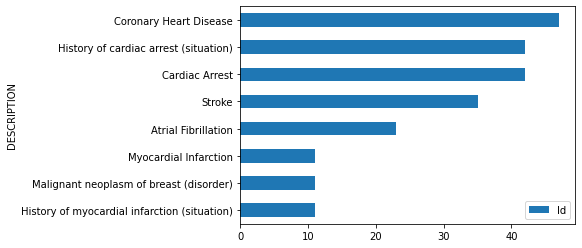

In [15]:
# Häufigsten Krankheiten 
description_count = description.groupby('DESCRIPTION').count()
ax = description_count.sort_values(by=['Id']).plot.barh()

In [16]:
df_NaN = df
df_NaN['DESCRIPTION'] = df_NaN['DESCRIPTION'].fillna('No Information')
description_NaN = df_NaN[['Id','DESCRIPTION']]

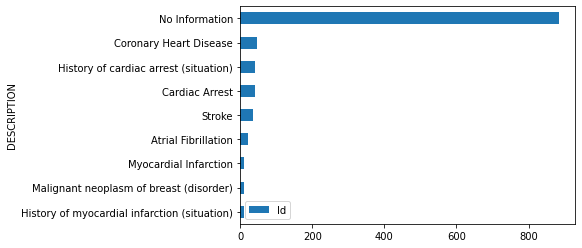

In [17]:
# Patienten ohne Information über die Krankheit
description_NaN_count = description_NaN.groupby('DESCRIPTION').count()
ax = description_NaN_count.sort_values(by=['Id']).plot.barh()

In [18]:
df_patient_procedure = df.join(procedure.set_index('PATIENT'), on='Id', rsuffix='_procedure')
df_patient_procedure.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,ENCOUNTER,CODE,DESCRIPTION,DATE,ENCOUNTER_procedure,CODE_procedure,DESCRIPTION_procedure,BASE_COST,REASONCODE,REASONDESCRIPTION
0,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,1956-06-22,NaN,999-51-6528,S99944910,X29408602X,Mr.,Lucio648,Simonis280,NaN,...,5075ad6e-11d5-017d-f011-253c838a1d86,53741008.0,Coronary Heart Disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,073d8e80-ff90-1c8d-57e4-29bfca52c87f,1964-08-28,NaN,999-90-4728,S99976204,X17497441X,Mrs.,Buffy238,Wolf938,NaN,...,NaN,NaN,No Information,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e1ff7e68-4097-9faf-514d-e4cfcfdf252e,1998-08-28,NaN,999-82-3645,S99973929,X88553898X,Ms.,Debora709,Klocko335,NaN,...,NaN,NaN,No Information,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a0f679cc-875f-dd72-ed13-9ca863ec6cf3,2004-01-20,NaN,999-93-6431,S99923001,NaN,NaN,Walton167,Kessler503,NaN,...,NaN,NaN,No Information,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e4166a9c-f7c5-bef7-ea43-b96281a2d586,2006-03-23,NaN,999-11-8697,NaN,NaN,NaN,Mariano761,Wiegand701,NaN,...,NaN,NaN,No Information,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
medication['DESCRIPTION'].unique()

array(['Clopidogrel 75 MG Oral Tablet', 'Simvastatin 20 MG Oral Tablet',
       'Amlodipine 5 MG Oral Tablet',
       'Nitroglycerin 0.4 MG/ACTUAT Mucosal Spray',
       'Warfarin Sodium 5 MG Oral Tablet',
       'Verapamil Hydrochloride 40 MG', 'Digoxin 0.125 MG Oral Tablet',
       '1 ML Epinephrine 1 MG/ML Injection',
       '3 ML Amiodarone hydrocholoride 50 MG/ML Prefilled Syringe',
       'Atropine Sulfate 1 MG/ML Injectable Solution',
       'Alteplase 100 MG Injection', 'Atorvastatin 80 MG Oral Tablet',
       'Captopril 25 MG Oral Tablet',
       '100 ML Epirubicin Hydrochloride 2 MG/ML Injection',
       'Cyclophosphamide 1000 MG Injection',
       'anastrozole 1 MG Oral Tablet',
       '5 ML hyaluronidase-oysk 2000 UNT/ML / trastuzumab 120 MG/ML Injection',
       'palbociclib 100 MG Oral Capsule', 'Paclitaxel 100 MG Injection',
       'Tamoxifen 10 MG Oral Tablet', 'Verzenio 100 MG Oral Tablet'],
      dtype=object)

In [20]:
procedure['DESCRIPTION'].unique()

array(['Electrical cardioversion', 'Catheter ablation of tissue of heart',
       'Echocardiography (procedure)',
       'Insertion of biventricular implantable cardioverter defibrillator',
       'Percutaneous mechanical thrombectomy of portal vein using fluoroscopic guidance',
       'Percutaneous coronary intervention',
       'Coronary artery bypass grafting', 'Mammography (procedure)',
       'Manual pelvic examination (procedure)',
       'Cytopathology procedure  preparation of smear  genital source (procedure)',
       'Screening mammography (procedure)',
       'Magnetic resonance imaging of breast (procedure)',
       'Biopsy of breast (procedure)',
       'Human epidermal growth factor receptor 2 gene detection by fluorescence in situ hybridization (procedure)',
       'Human epidermal growth factor receptor 2 gene detection by immunohistochemistry (procedure)',
       'Chemotherapy (procedure)',
       'Excision of axillary lymph node (procedure)',
       'Lumpectomy of bre

In [21]:
patient[['Id']].join(condition.set_index('PATIENT'), on='Id', how = 'inner')

,Id,START,STOP,ENCOUNTER,CODE,DESCRIPTION
0,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,2018-08-31,NaN,5075ad6e-11d5-017d-f011-253c838a1d86,53741008,Coronary Heart Disease
14,b4001499-a15a-980e-e3bb-e73b63045411,1984-11-07,NaN,c59520e4-f152-0952-8445-3b62ac99b1f3,49436004,Atrial Fibrillation
18,6c7c535b-322d-362f-2767-f80b0a03b7f8,1987-01-07,NaN,da76aa6d-f677-da4b-dfc7-15adf22d4ffd,410429000,Cardiac Arrest
18,6c7c535b-322d-362f-2767-f80b0a03b7f8,1987-01-07,NaN,da76aa6d-f677-da4b-dfc7-15adf22d4ffd,429007001,History of cardiac arrest (situation)
23,f5a6e3b3-781d-d800-d4c3-1782e39258e8,2014-08-06,NaN,d6a78205-ee1f-52a9-3fa6-b4cdd981f9f3,53741008,Coronary Heart Disease
...,...,...,...,...,...,...
971,76ec4c4d-02cf-14d9-3986-d48fc07b056e,2012-01-30,NaN,86e2f41a-ed8c-699b-2aed-2d78b434e9fb,429007001,History of cardiac arrest (situation)
973,67582b43-0f82-d0f6-e3df-54fa89a9bbf3,2003-07-10,NaN,0f7629e2-208f-be15-3de1-7e21b7eaa617,230690007,Stroke
977,89026ff7-018d-db8e-497d-53ed4e84fa36,2018-09-06,NaN,d2e3afa6-2a7d-a45a-35b8-e016d96fa0a3,53741008,Coronary Heart Disease
1003,bd3f4399-037a-454f-8a17-9711363f5833,1997-06-05,NaN,c52b648c-7ae4-0d5a-0c28-3a60dc697f3c,53741008,Coronary Heart Disease


In [22]:
observation.groupby("PATIENT").count()

,DATE,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
PATIENT,,,,,,,
009121bf-a672-8942-443e-85e18a33f766,33,0,33,33,33,33,33
0103a559-910a-03df-6117-ec429eeb4ac9,33,0,33,33,33,33,33
01739e74-c257-d750-9c7f-3cff9513511e,33,0,33,33,33,33,33
01a280b3-04f1-419c-d2f7-0aebc4126365,33,0,33,33,33,33,33
01b18347-90d9-e2b1-b142-8252c92cef8c,33,0,33,33,33,33,33
...,...,...,...,...,...,...,...
fefe51c3-dd11-9321-7e1a-a98603713461,30,0,30,30,30,30,30
ff464775-7c93-27c7-ac95-6bad65259f5f,33,0,33,33,33,33,33
ffa3fb1e-a8a6-6558-9f2a-e4e9fc09447e,33,0,33,33,33,33,33


In [23]:
print(medication)

                    START                  STOP  \
0    2018-08-31T11:47:46Z                   NaN   
1    2018-08-31T11:47:46Z                   NaN   
2    2018-08-31T11:47:46Z                   NaN   
3    2018-08-31T11:47:46Z                   NaN   
4    1984-11-07T16:26:07Z                   NaN   
..                    ...                   ...   
422  1997-06-05T04:17:30Z                   NaN   
423  1997-06-05T04:17:30Z                   NaN   
424  1997-06-05T04:17:30Z                   NaN   
425  2020-10-27T08:54:53Z  2020-10-27T09:09:53Z   
426  2020-10-27T08:54:53Z  2020-10-27T09:09:53Z   

                                  PATIENT  \
0    d2061cc7-bee0-0e6c-3ac4-15c197c474e0   
1    d2061cc7-bee0-0e6c-3ac4-15c197c474e0   
2    d2061cc7-bee0-0e6c-3ac4-15c197c474e0   
3    d2061cc7-bee0-0e6c-3ac4-15c197c474e0   
4    b4001499-a15a-980e-e3bb-e73b63045411   
..                                    ...   
422  bd3f4399-037a-454f-8a17-9711363f5833   
423  bd3f4399-037a-454f-8a1

# Qualitätsanaylse

In [41]:
Datasets = [(patient,"patients"),
            (procedure, "procedures"),
            (condition, "conditions"),
            (medication, "medications"),
            (observation, "observations")]

for df, name in Datasets:
  print(f"\nPercentage of missing values and duplicates in each column of {name}:\n")
  print(f"Number of duplicated values in {name}: {df.duplicated().sum()}\n")
  print((df.isnull()
           .sum(axis=0)
           .divide(len(patient))
           .round(2)
           .sort_values(ascending=False)))
  


Percentage of missing values and duplicates in each column of patients:

Number of duplicated values in patients: 0

SUFFIX                 0.99
DEATHDATE              0.98
MAIDEN                 0.73
ZIP                    0.46
MARITAL                0.32
PASSPORT               0.21
PREFIX                 0.18
DRIVERS                0.16
Id                     0.00
ADDRESS                0.00
HEALTHCARE_EXPENSES    0.00
LON                    0.00
LAT                    0.00
COUNTY                 0.00
STATE                  0.00
CITY                   0.00
RACE                   0.00
BIRTHPLACE             0.00
GENDER                 0.00
ETHNICITY              0.00
BIRTHDATE              0.00
LAST                   0.00
FIRST                  0.00
SSN                    0.00
HEALTHCARE_COVERAGE    0.00
dtype: float64

Percentage of missing values and duplicates in each column of procedures:

Number of duplicated values in procedures: 0

REASONCODE           0.04
REASONDESCRIPTION  